In [60]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import pandas as pd

In [239]:
pickle_file = 'SVHN.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  #valid_dataset = save['valid_dataset']
  #valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  #print('Training set', train_dataset.shape, train_labels.shape)
  print(type(train_dataset))
  print(train_labels.index)
  print(train_labels.shape)
    
  train_image_labels = train_labels.index
  test_image_labels = test_labels.index
  #print('Validation set', valid_dataset.shape, valid_labels.shape)
  #print('Test set', test_dataset.shape, test_labels.shape)

train_labels = train_labels.values
test_labels = test_labels.values

<type 'numpy.ndarray'>
Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            33393, 33394, 33395, 33396, 33397, 33398, 33399, 33400, 33401,
            33402],
           dtype='int64', name=u'ImageNumber', length=33373)
(33373, 55)


In [233]:
test_dataset[:5]

array([[[[ 0.06862745,  0.07254902,  0.08431373],
         [ 0.04509804,  0.06078431,  0.06862745],
         [ 0.02156863,  0.04117647,  0.04509804],
         ..., 
         [-0.02941176, -0.0254902 , -0.01764706],
         [ 0.13529412,  0.14313726,  0.14313726],
         [ 0.28431374,  0.28431374,  0.28823531]],

        [[ 0.04901961,  0.06078431,  0.08039216],
         [ 0.03333334,  0.04901961,  0.06078431],
         [ 0.00980392,  0.02941176,  0.02941176],
         ..., 
         [-0.0254902 , -0.02156863, -0.00980392],
         [ 0.11960784,  0.12352941,  0.13137256],
         [ 0.26862746,  0.26862746,  0.28039217]],

        [[ 0.03333334,  0.04117647,  0.06470589],
         [ 0.01764706,  0.02941176,  0.04117647],
         [-0.00588235,  0.00980392,  0.01372549],
         ..., 
         [-0.02156863, -0.01372549,  0.00196078],
         [ 0.06470589,  0.06862745,  0.07647059],
         [ 0.17843138,  0.18235295,  0.19019608]],

        ..., 
        [[ 0.36666667,  0.37843138,

In [240]:
def six_labels_to_five(test_labels):    
    test_labels_sample_orig = pd.DataFrame(test_labels).copy()
    num_lab_orig = pd.DataFrame(test_labels).ix[:,50:54].copy()
    num_lab_new = num_lab_orig.copy()
    num_lab_new[num_lab_new==0] = np.nan
    num_lab_new = num_lab_new.T
    num_lab_new = num_lab_new.fillna(method='bfill')
    num_lab_new = num_lab_new.T
    num_lab_new[num_lab_new==1] = 0
    num_lab_new = num_lab_new.fillna(1)
    test_labels_sample_orig.ix[:,50:54] = num_lab_new
    cols = test_labels_sample_orig.columns.tolist()
    cols = cols[:10] + cols[50:51] + cols[10:20] + cols[51:52] + cols[20:30] + cols[52:53] + cols[30:40] + cols[53:54] + cols[40:50] + cols[54:55]
    test_labels_sample_orig = test_labels_sample_orig.fillna(0)
    test_labels_sample_new = test_labels_sample_orig[cols]
    return test_labels_sample_new

test_labels = six_labels_to_five(test_labels)
train_labels = six_labels_to_five(train_labels)

#print(test_labels[1:2])
#print(six_labels_to_five(test_labels)[1:2].values.reshape(5,11))

In [242]:
merged_dataset = np.concatenate((train_dataset,test_dataset))
merged_labels = np.concatenate((train_labels,test_labels))
merged_image_labels = np.concatenate((train_image_labels,test_image_labels))

def randomize(dataset, labels, image_labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  shuffled_image_labels = image_labels[permutation]
  return shuffled_dataset, shuffled_labels, shuffled_image_labels
merged_dataset, merged_labels, merged_image_labels = randomize(merged_dataset, merged_labels, merged_image_labels)

<type 'numpy.int64'>
test/cropped/28620.png


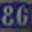

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)

In [295]:
#Test a sample image to make sure 

from IPython.display import display, Image
print(type(merged_image_labels[1]))
print("test/cropped/" + str(merged_image_labels[1]) + ".png")
display(Image(filename="train/cropped/" + str(merged_image_labels[5]) + ".png"))
merged_labels[5].reshape(5,11)

In [259]:
train_dataset = merged_dataset[0:merged_dataset.shape[0]/2,]
valid_dataset = merged_dataset[(merged_dataset.shape[0]/2):
                                    (merged_dataset.shape[0]/2+merged_dataset.shape[0]/4),]
test_dataset = merged_dataset[(merged_dataset.shape[0]/2+merged_dataset.shape[0]/4):merged_dataset.shape[0],]

train_labels = merged_labels[0:merged_labels.shape[0]/2,]
valid_labels = merged_labels[(merged_labels.shape[0]/2):
                                    (merged_labels.shape[0]/2+merged_labels.shape[0]/4),]
test_labels = merged_labels[(merged_labels.shape[0]/2+merged_labels.shape[0]/4):merged_labels.shape[0],]

train_image_labels = merged_image_labels[0:merged_image_labels.shape[0]/2,]
valid_image_labels = merged_image_labels[(merged_image_labels.shape[0]/2):
                                    (merged_image_labels.shape[0]/2+merged_image_labels.shape[0]/4),]
test_image_labels = merged_image_labels[(merged_image_labels.shape[0]/2+merged_image_labels.shape[0]/4):merged_image_labels.shape[0],]

2177
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


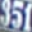

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [299]:
print(train_image_labels[0])
print(train_labels[0].reshape(5,11))
display(Image(filename="test/cropped/" + str(train_image_labels[0]) + ".png"))

train_labels_1 = train_labels[:,0:11]
train_labels_2 = train_labels[:,11:22]
train_labels_3 = train_labels[:,22:33]
train_labels_4 = train_labels[:,33:44]
train_labels_5 = train_labels[:,44:55]

print(train_labels_1[0])
print(train_labels_2[0])
print(train_labels_3[0])
print(train_labels_4[0])
print(train_labels_5[0])

In [260]:
train_labels_1 = train_labels[:,0:11]
train_labels_2 = train_labels[:,11:22]
train_labels_3 = train_labels[:,22:33]
train_labels_4 = train_labels[:,33:44]
train_labels_5 = train_labels[:,44:55]
#train_labels_6 = train_labels[:,50:55]

valid_labels_1 = valid_labels[:,0:11]
valid_labels_2 = valid_labels[:,11:22]
valid_labels_3 = valid_labels[:,22:33]
valid_labels_4 = valid_labels[:,33:44]
valid_labels_5 = valid_labels[:,44:55]
#valid_labels_6 = valid_labels[:,50:55]

test_labels_1 = test_labels[:,0:11]
test_labels_2 = test_labels[:,11:22]
test_labels_3 = test_labels[:,22:33]
test_labels_4 = test_labels[:,33:44]
test_labels_5 = test_labels[:,44:55]
#test_labels_6 = test_labels[:,50:55]

In [300]:
def accuracy(predictions, labels):
  labels_1 = labels[:,0:11]
  labels_2 = labels[:,11:22]
  labels_3 = labels[:,22:33]
  labels_4 = labels[:,33:44]
  labels_5 = labels[:,44:55]

  predictions_1 = predictions[:,0:11]
  predictions_2 = predictions[:,11:22]
  predictions_3 = predictions[:,22:33]
  predictions_4 = predictions[:,33:44]
  predictions_5 = predictions[:,44:55]
    
  total_observations = predictions.shape[0]
  #print(predictions[:,:11])
  acc_1 = np.argmax(predictions_1, 1) == np.argmax(labels_1, 1)
  acc_2 = np.argmax(predictions_2, 1) == np.argmax(labels_2, 1)
  acc_3 = np.argmax(predictions_3, 1) == np.argmax(labels_3, 1)
  acc_4 = np.argmax(predictions_4, 1) == np.argmax(labels_4, 1)
  acc_5 = np.argmax(predictions_5, 1) == np.argmax(labels_5, 1)

  acc = acc_1 & acc_2 & acc_3 & acc_4 & acc_5
  
  print(predictions_1[0])
  print(labels_1[0])
  print("Predicted: " + str(np.argmax(predictions_1[0])) + " " + str(np.argmax(predictions_2[0]))  + " " + 
        str(np.argmax(predictions_3[0]))  + " " + str(np.argmax(predictions_4[0]))  + " " + str(np.argmax(predictions_5[0])))
  print("Actual: " + str(np.argmax(labels_1[0])) + " " + str(np.argmax(labels_2[0]))  + " " + 
        str(np.argmax(labels_3[0]))  + " " + str(np.argmax(labels_4[0]))  + " " + str(np.argmax(labels_5[0])))

  return (100.0 * np.sum(acc)
          / predictions.shape[0])

In [262]:
valid_dataset.shape

(11608, 32, 32, 3)

In [320]:
batch_size = 100
patch_size = 5
depth = 16
num_hidden = 64
image_size = 32
num_channels = 3
num_labels = 11
num_numbers = 5

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    
  tf_train_labels1 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_train_labels2 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_train_labels3 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_train_labels4 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_train_labels5 = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
    
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))
  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
  layer3_weights = tf.Variable(tf.truncated_normal(
      [image_size // 4 * image_size // 4 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    
  number1_weights = tf.get_variable("WS1", shape=[num_hidden, num_labels],\
           initializer=tf.contrib.layers.xavier_initializer())
  number1_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  number2_weights = tf.get_variable("WS2", shape=[num_hidden, num_labels],\
           initializer=tf.contrib.layers.xavier_initializer())
  number2_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  number3_weights = tf.get_variable("WS3", shape=[num_hidden, num_labels],\
           initializer=tf.contrib.layers.xavier_initializer())
  number3_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  number4_weights = tf.get_variable("WS4", shape=[num_hidden, num_labels],\
           initializer=tf.contrib.layers.xavier_initializer())
  number4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  number5_weights = tf.get_variable("WS5", shape=[num_hidden, num_labels],\
           initializer=tf.contrib.layers.xavier_initializer())
  number5_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    #first convolutional layer
    conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    #second convolutional layer
    conv = tf.nn.conv2d(hidden, layer2_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    #fully-connected layer
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    #layers for the 5 numbers and length
    logits1 = tf.matmul(hidden, number1_weights) + number1_biases
    logits2 = tf.matmul(hidden, number2_weights) + number2_biases
    logits3 = tf.matmul(hidden, number3_weights) + number3_biases
    logits4 = tf.matmul(hidden, number4_weights) + number4_biases
    logits5 = tf.matmul(hidden, number5_weights) + number5_biases
    return logits1, logits2, logits3, logits4, logits5
  
  # Training computation.
  #print(logits1.shape)
  #logits1, logits2, logits3, logits4, logits5, logits6 = model(tf_train_dataset)
  logits1, logits2, logits3, logits4, logits5 = model(tf_train_dataset)
  print(logits1) 
  print(tf_train_labels1)
  #print(logits6)
    
  loss1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits1, tf_train_labels1))
  loss2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits2, tf_train_labels2))
  loss3 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits3, tf_train_labels3))
  loss4 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits4, tf_train_labels4))
  loss5 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits5, tf_train_labels5))

  loss = loss1 + loss2 + loss3 + loss4 + loss5
  #loss = loss1

  #loss = tf.add_n(loss_per_digit)

  '''
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits1, tf_train_labels1) + 
    tf.nn.softmax_cross_entropy_with_logits(logits2, tf_train_labels2) + 
    tf.nn.softmax_cross_entropy_with_logits(logits3, tf_train_labels3) + 
    tf.nn.softmax_cross_entropy_with_logits(logits4, tf_train_labels5) + 
    tf.nn.softmax_cross_entropy_with_logits(logits5, tf_train_labels5) + 
    tf.nn.softmax_cross_entropy_with_logits(logits6, tf_train_labels6))
  '''
  
  # Optimizer.
  # learning rate decay
  #global_step = tf.Variable(0)  # count the number of steps taken.
  #learning_rate = tf.train.exponential_decay(0.5, global_step, 100, 0.96, staircase=True)
  #optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

  optimizer = tf.train.GradientDescentOptimizer(0.25).minimize(loss)

  # Predictions for the training, validation, and test data.
  train_prediction = tf.concat(1, [tf.nn.softmax(logits1), tf.nn.softmax(logits2), tf.nn.softmax(logits3),
                                  tf.nn.softmax(logits4), tf.nn.softmax(logits5)])
  #train_prediction_6 = tf.nn.softmax(logits6)
  
  valid_logits1, valid_logits2, valid_logits3, valid_logits4, valid_logits5 = model(tf_valid_dataset)
  test_logits1, test_logits2, test_logits3, test_logits4, test_logits5 = model(tf_test_dataset)
    
  valid_prediction = tf.concat(1, [tf.nn.softmax(valid_logits1), tf.nn.softmax(valid_logits2), 
                                                      tf.nn.softmax(valid_logits3),
                                  tf.nn.softmax(valid_logits4), tf.nn.softmax(valid_logits5)])
  
  test_prediction = tf.concat(1, [tf.nn.softmax(test_logits1), tf.nn.softmax(test_logits2), tf.nn.softmax(test_logits3),
                                  tf.nn.softmax(test_logits4), tf.nn.softmax(test_logits5)])

Tensor("add_3:0", shape=(100, 11), dtype=float32)
Tensor("Placeholder_1:0", shape=(100, 11), dtype=float32)


Initialized


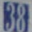

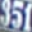

Minibatch loss at step 0: 38.804531
[  1.27770077e-03   1.84301231e-02   1.04212944e-04   1.93118581e-06
   6.69066980e-09   1.82654869e-04   1.68154045e-04   7.90327549e-01
   3.99124809e-03   1.84730604e-01   7.85875425e-04]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
Predicted: 7 9 7 7 7
Actual: 3 5 1 10 10
Minibatch accuracy: 0.0%
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

In [ ]:
#batch_size = 100
num_steps = 100000

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]

    batch_labels = train_labels[offset:(offset + batch_size), :]
    batch_labels1 = train_labels_1[offset:(offset + batch_size), :]
    batch_labels2 = train_labels_2[offset:(offset + batch_size), :]
    batch_labels3 = train_labels_3[offset:(offset + batch_size), :]
    batch_labels4 = train_labels_4[offset:(offset + batch_size), :]
    batch_labels5 = train_labels_5[offset:(offset + batch_size), :]
    
    batch_image_labels = train_image_labels[offset:(offset + batch_size)]
    

    feed_dict = {tf_train_dataset : batch_data, tf_train_labels1 : batch_labels1, tf_train_labels2 : batch_labels2
                , tf_train_labels3 : batch_labels3, tf_train_labels4 : batch_labels4, tf_train_labels5 : batch_labels5}
    
    _, l, l1, l2, l3, l4, l5, predictions = session.run(
      [optimizer, loss, loss1, loss2, loss3, loss4, loss5, train_prediction], feed_dict=feed_dict)
    #print(train_prediction)
    #print(batch_labels1)
    #print(predictions)
    if (step % 500 == 0):
      try:
          display(Image(filename="train/cropped/" + str(batch_image_labels[0]) + ".png"))
      except IOError as e:
          print('')
      try:
          display(Image(filename="test/cropped/" + str(batch_image_labels[0]) + ".png"))
      except IOError as e:
          print('')
      #print(batch_labels[1].reshape(5,11))
      print('Minibatch loss at step %d: %f' % (step, l))
      #print(batch_labels.shape)
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))